## **Chapter 7: Data Cleaning and Preparation**

### **7.1 Handling Missing Data**

Trong quá trình phân tích dữ liệu thực tế, việc **dữ liệu bị thiếu** là điều không thể tránh khỏi. Bạn có thể gặp những cột bị bỏ trống, những ô không có thông tin do lỗi nhập liệu, hệ thống ghi nhận thiếu, hoặc đơn giản là dữ liệu chưa được thu thập.

Theo thống kê, **khoảng 80% thời gian làm phân tích dữ liệu được dành cho việc chuẩn bị dữ liệu**, trong đó có xử lý dữ liệu thiếu.

##### **🧠 Pandas hỗ trợ xử lý dữ liệu thiếu như thế nào?**

Một trong những mục tiêu của thư viện **pandas** là giúp việc xử lý dữ liệu thiếu trở nên **đơn giản, nhất quán** và **linh hoạt**.

**✅ Cách biểu diễn dữ liệu thiếu trong pandas:**
- Với dữ liệu dạng **số thực (float64)**, pandas sử dụng giá trị đặc biệt **NaN (Not a Number)**.
- Với dữ liệu dạng **chuỗi hoặc hỗn hợp (object)**, pandas chấp nhận cả NaN và None (giá trị rỗng trong Python).

In [2]:
import pandas as pd
import numpy as np

float_data = pd.Series([1.2, -3.5, np.nan, 0])
print(float_data)

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64


##### **🔍 Phát hiện dữ liệu bị thiếu**

Bạn có thể sử dụng:
- `isna()` hoặc `pd.isna()`: trả về True nếu là giá trị bị thiếu.
- `notna()` hoặc `pd.notna()`: trả về True nếu là giá trị hợp lệ.

In [3]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

Áp dụng cho chuỗi:

In [4]:
string_data = pd.Series(["aardvark", np.nan, None, "avocado"])
print(string_data.isna())

0    False
1     True
2     True
3    False
dtype: bool


##### **🧰 Các công cụ xử lý dữ liệu thiếu trong pandas**

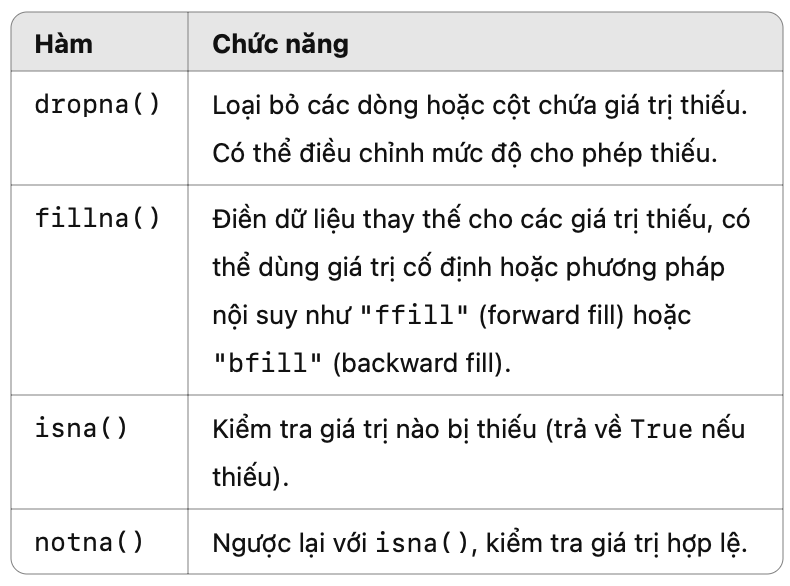

##### **🧭 Tại sao xử lý dữ liệu thiếu lại quan trọng?**

- Tránh sai lệch khi tính toán thống kê (ví dụ: tính trung bình, tổng).
- Phát hiện lỗi thu thập dữ liệu hoặc xu hướng thiếu dữ liệu.
- Giúp mô hình học máy hoạt động chính xác hơn.

In [5]:
df = pd.DataFrame({
    "A": [1, 2, np.nan],
    "B": [4, np.nan, 6]
})

print(df.dropna())   # Xoá dòng nào có NaN
print(df.fillna(0))  # Thay thế NaN bằng 0

     A    B
0  1.0  4.0
     A    B
0  1.0  4.0
1  2.0  0.0
2  0.0  6.0


##### **🔎 Ghi nhớ**
- **NaN và None đều được coi là dữ liệu thiếu trong pandas.**
- Phân tích dữ liệu thiếu trước khi xử lý giúp bạn hiểu rõ hơn về chất lượng dữ liệu ban đầu.
- Pandas thiết kế nhất quán cho mọi kiểu dữ liệu để bạn dễ dàng làm việc mà không cần xử lý từng trường hợp đặc biệt.

#### **Filtering Out Missing Data**

Khi bạn làm việc với **dữ liệu thiếu**, bước đầu tiên phổ biến nhất chính là **lọc bỏ (filtering out)** những phần tử đó để đảm bảo dữ liệu sạch hơn.

##### **✂️ Cách 1: Lọc thủ công bằng Boolean Indexing**

Giả sử bạn có một Series chứa các giá trị thiếu:

In [6]:
data = pd.Series([1, np.nan, 3.5, np.nan, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

Bạn có thể lọc ra các phần tử **không bị thiếu** như sau:

In [7]:
data[data.notna()]

0    1.0
2    3.5
4    7.0
dtype: float64

Hoặc dùng `dropna()` – **ngắn gọn hơn** nhưng hiệu quả y hệt:

In [8]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

📌 Kết luận: `dropna()` trên Series **giữ lại những giá trị hợp lệ** (không bị thiếu).

##### **🧱 Làm việc với DataFrame**

**👇 Mặc định: dropna() loại bỏ các hàng chứa bất kỳ giá trị thiếu nào**

In [9]:
data = pd.DataFrame([
    [1.0, 6.5, 3.0],
    [1.0, np.nan, np.nan],
    [np.nan, np.nan, np.nan],
    [np.nan, 6.5, 3.0]
])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [10]:
data.dropna()

,0,1,2
0,1.0,6.5,3.0


👉 Chỉ giữ lại dòng **hoàn toàn không có giá trị thiếu**

**🧠 how="all": Chỉ loại các hàng mà toàn bộ giá trị đều bị thiếu**

In [11]:
data.dropna(how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


📌 Giữ lại cả những hàng có **ít nhất một giá trị hợp lệ**

**🔁 Loại bỏ cột bị thiếu hoàn toàn**

Bạn có thể loại bỏ **cột** thay vì hàng bằng cách truyền tham số `axis="columns"`.

In [12]:
data[4] = np.nan  # thêm cột toàn NaN
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


##### **🎯 Lọc dữ liệu theo ngưỡng tối thiểu thresh**

Giả sử bạn chỉ muốn giữ lại những dòng có **ít nhất n giá trị hợp lệ** (không phải NaN).

In [13]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))

df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan

df

,0,1,2
0,-0.109722,NaN,NaN
1,0.253009,NaN,NaN
2,0.636422,NaN,0.123689
3,-1.052312,NaN,0.217169
4,-0.138306,-0.760534,0.606219
5,-0.194847,-0.481080,-1.234267
6,-1.079453,-0.813604,0.153860


**💥 dropna(thresh=2) nghĩa là: chỉ giữ các dòng có ít nhất 2 giá trị hợp lệ**

In [14]:
df.dropna(thresh=2)

,0,1,2
2,0.636422,NaN,0.123689
3,-1.052312,NaN,0.217169
4,-0.138306,-0.760534,0.606219
5,-0.194847,-0.481080,-1.234267
6,-1.079453,-0.813604,0.153860


✅ Những dòng có quá nhiều giá trị thiếu (ít hơn 2 giá trị hợp lệ) sẽ bị loại bỏ.

##### **📌 Tóm lại: Các kỹ thuật lọc dữ liệu thiếu**
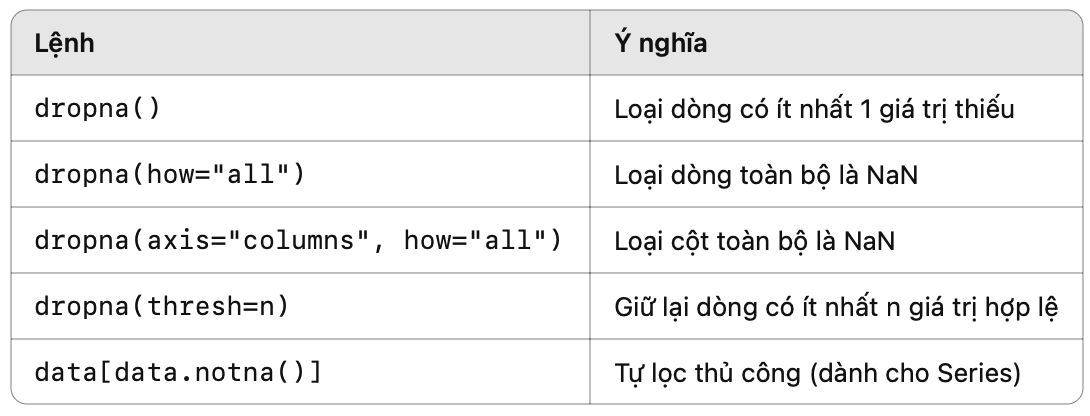

#### **Filling In Missing Data**

##### **🧠 Tại sao có dữ liệu bị thiếu (NaN)?**

Trong thực tế, dữ liệu rất hay bị thiếu! Ví dụ:
- Một khách hàng không điền địa chỉ email.
- Một cảm biến đo nhiệt độ bị lỗi và không ghi dữ liệu vào một số thời điểm.
- Một cột trong bảng Excel bị bỏ trống vài dòng.

Trong pandas, các giá trị bị thiếu thường được hiển thị là **NaN** (Not a Number). Trước khi phân tích hay huấn luyện mô hình học máy, **ta cần xử lý những giá trị này**!

##### **🎯 Các cách xử lý dữ liệu thiếu**

Có nhiều cách, nhưng hôm nay ta học cách **điền giá trị vào ô bị thiếu**, chứ **không xóa** dữ liệu:
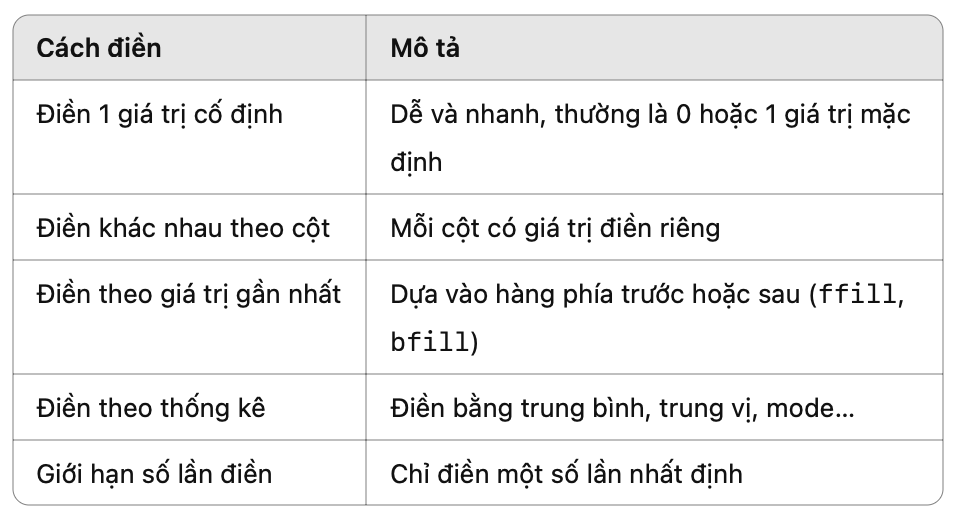

##### **🔧 Hàm `fillna()` – công cụ “đa năng” xử lý NaN**

In [15]:
DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None)

NameError: name 'DataFrame' is not defined

**✅ Điền tất cả NaN bằng một số cụ thể**

In [16]:
df.fillna(0)

,0,1,2
0,-0.109722,0.000000,0.000000
1,0.253009,0.000000,0.000000
2,0.636422,0.000000,0.123689
3,-1.052312,0.000000,0.217169
4,-0.138306,-0.760534,0.606219
5,-0.194847,-0.481080,-1.234267
6,-1.079453,-0.813604,0.153860


🔹 Đây là cách nhanh nhất để “lấp chỗ trống” bằng 0 – rất phù hợp khi giá trị thiếu không quan trọng hoặc có ý nghĩa là “chưa có”, “chưa đo được”…

**✅ Điền khác nhau cho từng cột**

In [17]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-0.109722,0.500000,0.000000
1,0.253009,0.500000,0.000000
2,0.636422,0.500000,0.123689
3,-1.052312,0.500000,0.217169
4,-0.138306,-0.760534,0.606219
5,-0.194847,-0.481080,-1.234267
6,-1.079453,-0.813604,0.153860


📌 Cột 1 sẽ được điền bằng 0.5, còn cột 2 bằng 0. Điều này cực kỳ hữu ích khi bạn biết rõ ý nghĩa của từng cột!

**✅ Điền theo dòng trước đó – `ffill` (forward fill)**

In [18]:
df.fillna(method='ffill')

/var/folders/bg/hsvxykxj7yx0jz1nrhc3k6z40000gn/T/ipykernel_78822/1193302488.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')


,0,1,2
0,-0.109722,NaN,NaN
1,0.253009,NaN,NaN
2,0.636422,NaN,0.123689
3,-1.052312,NaN,0.217169
4,-0.138306,-0.760534,0.606219
5,-0.194847,-0.481080,-1.234267
6,-1.079453,-0.813604,0.153860


📌 Cách này sẽ dùng giá trị của dòng **trước đó** để lấp chỗ trống hiện tại.

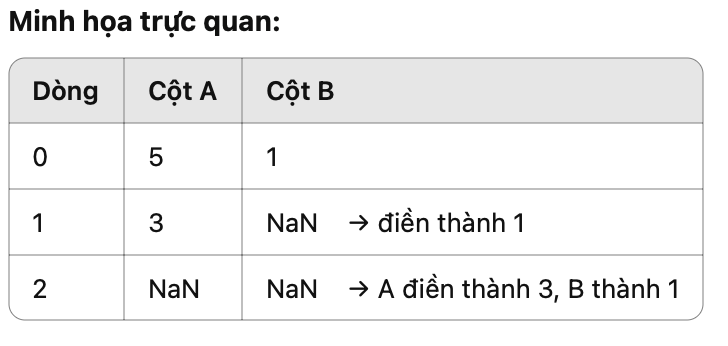

**✅ `ffill` với giới hạn (limit)**

In [19]:
df.fillna(method='ffill', limit=2)

/var/folders/bg/hsvxykxj7yx0jz1nrhc3k6z40000gn/T/ipykernel_78822/2719175769.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', limit=2)


,0,1,2
0,-0.109722,NaN,NaN
1,0.253009,NaN,NaN
2,0.636422,NaN,0.123689
3,-1.052312,NaN,0.217169
4,-0.138306,-0.760534,0.606219
5,-0.194847,-0.481080,-1.234267
6,-1.079453,-0.813604,0.153860


📌 Chỉ điền tối đa **2 ô liên tiếp**. Những ô thiếu tiếp theo sẽ vẫn là NaN.

**✅ Điền bằng giá trị thống kê – Trung bình**

In [20]:
data = pd.Series([1., np.nan, 3.5, np.nan, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

📌 Giá trị trung bình là (1 + 3.5 + 7) / 3 = **3.83**, sẽ được dùng để thay cho các NaN.

##### **🧰 Tổng kết bảng các tham số trong `fillna()`**
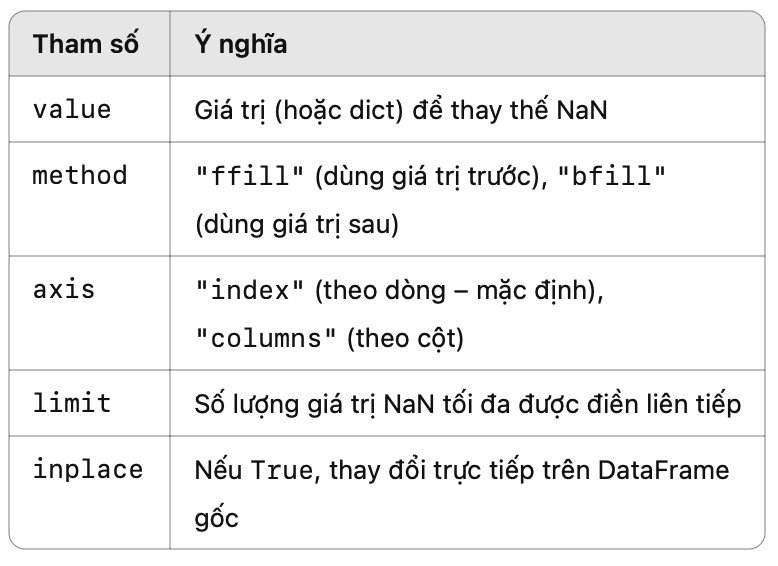

##### **💡 Mẹo thực hành**
🔸 Dữ liệu thời gian (time series)? → Ưu tiên dùng `ffill` hoặc `bfill`.  
🔸 Câu hỏi trắc nghiệm với câu trả lời trống? → Dùng trung bình hoặc mode.  
🔸 Mỗi cột có ý nghĩa khác nhau? → Dùng fillna({col1: val1, col2: val2}).  